# Introduction

If you are a fan of Qgis or its commercial counterpart ArcPro, you know that they have a myriad of tools to perform imagery analysis. By the way, there has been, and therer still is a free ESRI Massive Open Online Cource (MOOC) known as imagery analysis that gives you a headstart on raster analysis in GIS. Anyway, back to our script. Just as Qgis has several features for imagery analysis, so does python too. Today we will start simple, as this has been done before using R. We shall load and view a raster file in python. Qgis takes the crown for loading rasters easily, just click and go. But python offers no such comfort. In python, it is a long list, and sometimes verbose commands. However, the world is now becoming a programming arena, and it is good to practise it before it catches up with us forcefully. On a light note, some excellent editors used to oppose the mainstreaming of computers to editorial work, just look at the editing world today and wonder how they could ever refuse. It could be the same way with GIS!

The satellite file we have downloaded is a Landsat 9 archive dated 2022-01-14 and of ID **LC09_L1TP_170060_20220114_20220114_02_T1** from Earth Explorer. However, the forthcoming steps are simple enough to be replicated with any other satellite archive. Thus, let's begin. 

Satellite files from Earth Explorer normally come as a .tar file. We like to use 7zip software to unzip this .tar file, but Python can do the trick too.

## Unzipping the satellite archive

To unzip a file, the `zipfile` package is used. However, this tool is useless when extracting a .tar file. The appropriate tool to use is the `tarfile` package. You have to import it to anaconda first before calling it to jupyter from whence these operations are based.

In [1]:
# import tar module
import tarfile

Now let's split open the .tar file.

In [2]:
# open the Landsat 9 archive
file = tarfile.open("E:/documents/gis800_articles/satellite_python/LC09_L1TP_170060_20220114_20220114_02_T1.tar")

Secondly, let's extract the contents and close the process to preserve precious memory. We have specifed the path that the Landsat 9 contents will be extracted to.

In [3]:
# Extracting a file
file.extractall(path="E:/documents/gis800_articles/satellite_python/landsat9")

Now close the process(https://www.pythontutorial.net/python-basics/python-read-text-file/).

In [5]:
# Close the file to save memory
file.close()

## List the extracted files

After extracting the files, it is good to know the contents. Who cooks a meal without tasting it afterwards? Let's do likewise in our case here.

First, we will load in a module that specializes working with computer directories.

In [6]:
# Import the os module
import os

Now let's get the list of files inside our extracted directory.

In [8]:
# List the files in a directory
import os

In [9]:
# Get the list of all files and directories withing landsat 9 folder
l9_files = os.listdir("E:/documents/gis800_articles/satellite_python/landsat9")

Since the above function `listdir` returns a list of files in a particular directory, we can use a `for` loop to iteratively name every file within this directory. 

In [10]:
# Print out the files in landsat 9 folder
for file in l9_files:
    print("In landsat9 folder: ", file)

In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_ANG.txt
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B10.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B11.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B8.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_B9.TIF
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_MTL.json
In landsat9 folder:  LC09_L1TP_170060_20220114_20220114_02_T1_MTL.txt
In landsat9 folder:  LC09_L1

Whoa! There goes an entire list of all files that come pre-packages in a Landsat 9 archive. Now let's have a look at the metadata.

In [28]:
# Read the metadata
with open("E:/documents/gis800_articles/satellite_python/landsat9/LC09_L1TP_170060_20220114_20220114_02_T1_MTL.txt") as text_file:
    contents = text_file.readlines()
print(contents)
        

['GROUP = LANDSAT_METADATA_FILE\n', '  GROUP = PRODUCT_CONTENTS\n', '    ORIGIN = "Image courtesy of the U.S. Geological Survey"\n', '    DIGITAL_OBJECT_IDENTIFIER = "https://doi.org/10.5066/P975CC9B"\n', '    LANDSAT_PRODUCT_ID = "LC09_L1TP_170060_20220114_20220114_02_T1"\n', '    PROCESSING_LEVEL = "L1TP"\n', '    COLLECTION_NUMBER = 02\n', '    COLLECTION_CATEGORY = "T1"\n', '    OUTPUT_FORMAT = "GEOTIFF"\n', '    FILE_NAME_BAND_1 = "LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF"\n', '    FILE_NAME_BAND_2 = "LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF"\n', '    FILE_NAME_BAND_3 = "LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF"\n', '    FILE_NAME_BAND_4 = "LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF"\n', '    FILE_NAME_BAND_5 = "LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF"\n', '    FILE_NAME_BAND_6 = "LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF"\n', '    FILE_NAME_BAND_7 = "LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF"\n', '    FILE_NAME_BAND_8 = "LC09_L1TP_170

In [32]:
contents2= str(contents)
content2 = contents2.replace(',','\n')
print(contents2)

['GROUP = LANDSAT_METADATA_FILE\n', '  GROUP = PRODUCT_CONTENTS\n', '    ORIGIN = "Image courtesy of the U.S. Geological Survey"\n', '    DIGITAL_OBJECT_IDENTIFIER = "https://doi.org/10.5066/P975CC9B"\n', '    LANDSAT_PRODUCT_ID = "LC09_L1TP_170060_20220114_20220114_02_T1"\n', '    PROCESSING_LEVEL = "L1TP"\n', '    COLLECTION_NUMBER = 02\n', '    COLLECTION_CATEGORY = "T1"\n', '    OUTPUT_FORMAT = "GEOTIFF"\n', '    FILE_NAME_BAND_1 = "LC09_L1TP_170060_20220114_20220114_02_T1_B1.TIF"\n', '    FILE_NAME_BAND_2 = "LC09_L1TP_170060_20220114_20220114_02_T1_B2.TIF"\n', '    FILE_NAME_BAND_3 = "LC09_L1TP_170060_20220114_20220114_02_T1_B3.TIF"\n', '    FILE_NAME_BAND_4 = "LC09_L1TP_170060_20220114_20220114_02_T1_B4.TIF"\n', '    FILE_NAME_BAND_5 = "LC09_L1TP_170060_20220114_20220114_02_T1_B5.TIF"\n', '    FILE_NAME_BAND_6 = "LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF"\n', '    FILE_NAME_BAND_7 = "LC09_L1TP_170060_20220114_20220114_02_T1_B7.TIF"\n', '    FILE_NAME_BAND_8 = "LC09_L1TP_170

## Rasters in Python

Now that we have looked at the metadata of the file and the existing files in our directory, let's proceed to viewing one of the raster bands. Did we mention we would start simple? Working with raster bands in python requires the `rasterio` module.

In [33]:
# Import rasterio into python
import rasterio as rio

To load a raster into python, you have to first open it using `open` function of the `rasterio` module. By random choice, we have decided to work with band 6 of our Landsat 9 folder.

In [35]:
# Open band 6
band6 = rio.open("E:/documents/gis800_articles/satellite_python/landsat9/LC09_L1TP_170060_20220114_20220114_02_T1_B6.TIF")

 The `show` function does the showing off. 

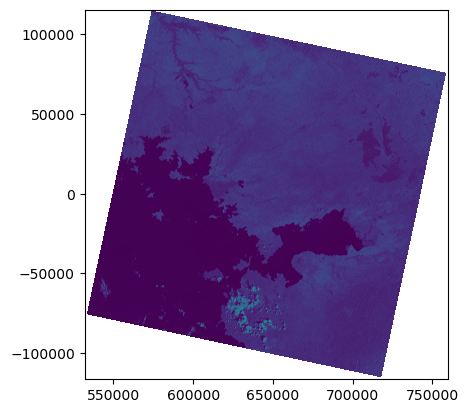

<AxesSubplot: >

In [37]:
# Plot the raster
from rasterio.plot import show
show(band6)

Wallaaah! There goes our raster image. 

However, our raster image could do better with some color. Let's add some groove to the above dark incomprehensible image. By adding the `cmap` property to the `show` function, we can specify any color schema for our raster image.

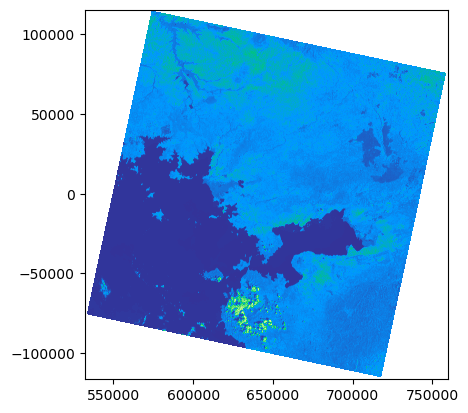

<AxesSubplot: >

In [38]:
# Plot the raster with some color
show(band6, cmap='terrain')

Not bad. What do you think the deep blue feature at the bottom looks like? Just make an uninformed guess, even if you don't know the area we are working with. 

There is one problem though. Rarely does one work with a raster file that huge. Unless where absolutely necessary, it is recommended to crop a raster into a specific area of interest in order to save on memory and processing time. 

To make matters in this exercise simpler, we have already provided the shapefile to perform the clipping operation. Sometimes clipping is known as cropping, as in like cropping your screenshot on phone. The shapefile is available from here(insert the link to the shapefile).

In [40]:
# First import the package for spatial operations
import geopandas as gpd

To load a shapefile into python, the `read_file` function is used.

In [41]:
# Read the shapefile
shapefile = gpd.read_file("E:/documents/gis800_articles/satellite_python/roi.shp")

For any clipping, cropping or masking operation in python, by whatever name you call it, both files have to be in the same  Coordinate Reference System (CRS). Let's first check out the CRS for our band6 from which we shall transform our shapefile into.

In [42]:
# Check CRS of band6
band6.crs

CRS.from_epsg(32636)

For some unknown reason, it shows its CRS values as `from_epsg(32636)`. This looks weird, so let's change the output to something more *professionally* looking.

In [43]:
band6.crs.to_proj4()

'+init=epsg:32636'

That's a bit better. Time to convert our `shapefile` to the above CRS. This can be easily done with the `to_crs` function.

In [44]:
# Change the CRS of the shapefile
shapefile2 = shapefile.to_crs("EPSG:32636")

Confirm that `shapefile2` has the intended CRS.

In [45]:
# Check the CRS of our new shapefile
shapefile2.crs

<Derived Projected CRS: EPSG:32636>
Name: WGS 84 / UTM zone 36N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 30°E and 36°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Cyprus. Egypt. Ethiopia. Finland. Israel. Jordan. Kenya. Lebanon. Moldova. Norway. Russian Federation. Saudi Arabia. Sudan. Syria. Turkey. Uganda. Ukraine.
- bounds: (30.0, 0.0, 36.0, 84.0)
Coordinate Operation:
- name: UTM zone 36N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now it so happens that the masking process in python requires far more details and work than the `Extract` tool in Qgis. Infact, Python will not mask a raster with a shapefile if the geometries of the latter are not in the format it wants them. We tried it without using the specifications, as in the format, 

```python
out_img, out_transform = mask(raster=data, shapes=<our shapefile>, crop=True)
```
but it didn't work out. This article [here](https://automating-gis-processes.github.io/CSC18/lessons/L6/clipping-raster.html?utm_source=pocket_reader) gives a step-by-step account of how to transform the geometries into the preferred format of the `mask` function.

It's all done using one custom function.

In [46]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

So what does the above function do to get what we want? Let's go through it line by line. In the cartoon movie "Green Lantern: Beware my power", Green Arrow tells the new Green Lantern cop, John Stewart that the signature of a sophisticated technology is its simplicity. We will endeavor to stick with that line as we explain the above simple function.

```python
def getFeatures(gdf):
```

The above line is simply our functions are created in python. Functions are created using the `def` keyword. Next...

```python
import json
```

This code line tells python to import the `json` module, which is used to perform operations on and with `json` files. However, this last one-liner is the wall to our treasure house.

```python
return [json.loads(gdf.to_json())['features'][0]['geometry']]
```

The above one line does this: the statement `json.loads(gdf.to_json())` loads a spatial object, converts it to a .json file and from this .json file/ This .json file is actually now a dictionary of dicitionaries. The attributes of the spatial file have been converted into a dictionary of dictionaries with each column field acting as the key. From this dictionary of dictionaries get the dictionaries under the keyword `features`, specifically that dictionary of dictionaries at index [0] but concentrate on those values from `geometry` key within that dictionary of dictionaries.


After all has been said and done, let's apply our function to the `shapefile2` object. This is in order to get the geometries in the format preferred by `mask` function.

In [48]:
# Get geometries in format required by mask
shapefile_coords = getFeatures(shapefile2)

Let's view the coordinates in our `shapefile_coords` object. 

In [55]:
# Print coordinates
print(shapefile_coords)

[{'type': 'Polygon', 'coordinates': [[[600420.787380679, 16174.610129092142], [638888.0705606076, 16866.595389247683], [638888.0705606074, -26834.935271344206], [600704.6787694613, -26692.989576953325], [600420.787380679, 16174.610129092142]]]}]


With our coordinatess in the required format, it's time to not spare the axe in any way in clipping our raster image --`band6`.

In [59]:
# Now crop the raster using the shapefile_coords
from rasterio.mask import mask
band6_crop, band6_transform = mask(dataset=band6, shapes=shapefile_coords, crop=True)

"Why use two object names, `band6_crop` and `band6_transform`? Isn't one enough. The trick we have used here is simply store the result of mask to two object names all at once. This is just the same way you would store a number or a photo to google drive and phone simoultaneously. In fact, to make this concept naturally sink in, consider the below example. We are simply storing the string 24 to two variable names, `number` and `num`. Upon printing each, they both display the string 24. It's just what we have done above for the object names arising from the `mask` function. This trick is particularly useful if you would like to use the same feature in more than one activity.

In [60]:
number, num = str(24)

print("Number is ", number)
print("Number is ", num)

Number is  2
Number is  4


All satellite bands have metadata attributes in them. Just check for band6 and you will see its metadata. However, unlike in Qgis where the metadata is retained or modified after using the `Extract raster` tool, in python it all seems to disappear unless you copy it back. To validate our findings, let's check out if the metadata exists in both our rasters: `band6` and `band6_crop`.

In [63]:
# Check metadata for band6
band6.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7591,
 'height': 7731,
 'count': 1,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(30.0, 0.0, 531885.0,
        0.0, -30.0, 115515.0)}

In [64]:
# Check metadata for band6_crop
band6_crop.meta

AttributeError: 'numpy.ndarray' object has no attribute 'meta'

Zilch. 

Let's copy the metadata for the former to the latter. 

In [82]:
# Copy the original metadata to band6_crop
band6_crop_meta = band6.meta.copy()
band6_crop_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7591,
 'height': 7731,
 'count': 1,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(30.0, 0.0, 531885.0,
        0.0, -30.0, 115515.0)}

Now update the metadata for our cropped image with the correct values. Since our data is cropped, there is no way it can have the same properties as that of the parent raster.

In [83]:
# Update the metadata for our cropped raster from the original
band6_crop_meta.update({"driver": "GTiff",
                        "height": band6_crop.shape[1],
                        "width": band6_crop.shape[2],
                        "transform": band6_transform,
                        "crs": band6.crs.to_proj4()})

band6_crop_meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 1283,
 'height': 1457,
 'count': 1,
 'crs': '+init=epsg:32636',
 'transform': Affine(30.0, 0.0, 600405.0,
        0.0, -30.0, 16875.0)}

Don't scratch your head with above code, for there is no magic done. Remove the thought of the mundane, and study the structure of `band6_crop_meta` with that of band6's metadata. You will notice the metadata of band6_crop_meta follows that of its predecessor like so: 'driver', 'height', 'width', 'transform' and 'crs'. The only eyebrow raising function used here is `shape`. Shape simply returns the [dimensions of a Pandas or Numpys object](https://www.digitalocean.com/community/tutorials/python-shape-method) in python. At the very basic level, computers read data in terms of two digits only, 0 and 1. They do the same for every data, images included, and in our case, rasters also. Even code is read in terms of 0 and 1 at the very basic level. 

To experiment with the functionality of `shape` function. Check the following two examples. Shape was in the `band6_crop_meta` object was only used to get the dimensions of our cropped image (`band6_crop`) and auto-assign it to the height and width metadata properties of the cropped image. There is no way we would copy the dimensions of our parent raster image (band6) to our cropped image! That would be downright foolish!

In [85]:
# First reprint metadata of band 6. Note the height and width values.
band6.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 7591,
 'height': 7731,
 'count': 1,
 'crs': CRS.from_epsg(32636),
 'transform': Affine(30.0, 0.0, 531885.0,
        0.0, -30.0, 115515.0)}

In [86]:
# We use shape to get the height value. Crosscheck that the height values from shape operation match to those of band6
band6.shape[0]

7731

In [87]:
# We use shape to get the width value. Crosscheck that the width values from shape operation match to those of band6
band6.shape[1]

7591

## Plot and save the raster

Finally, since our cropped raster has all the right dimenions, isn't it time we plotted and saved it to bring this whole exercise to a close?

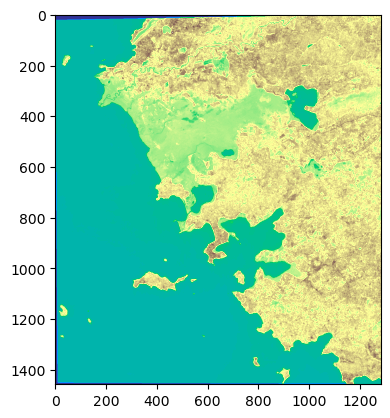

<AxesSubplot: >

In [88]:
# Plot the raster
show(band6_crop, cmap='terrain')

To save our raster, use the code below. The ** which stands for other keyword arguments in python, simply tells python to store the same metadata found in the object `band6_crop_meta` to the new file in the directory.
    

In [89]:
# Save our above raster
with rio.open("E:/documents/gis800_articles/satellite_python/results/band6_cropped.tif", mode='w', **band6_crop_meta) as dest:
    dest.write(band6_crop)

# Conclusion